# Implementacion de las figuras resultado de analizar el ILA

Implementacion de las figuras del ILA

## Carga de librerias

In [13]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import lfilter, firwin, freqz, resample
from scipy.fft import fft, ifft, fftfreq
from scipy.interpolate import interp1d

### Lectura del archivo CSV del ILA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


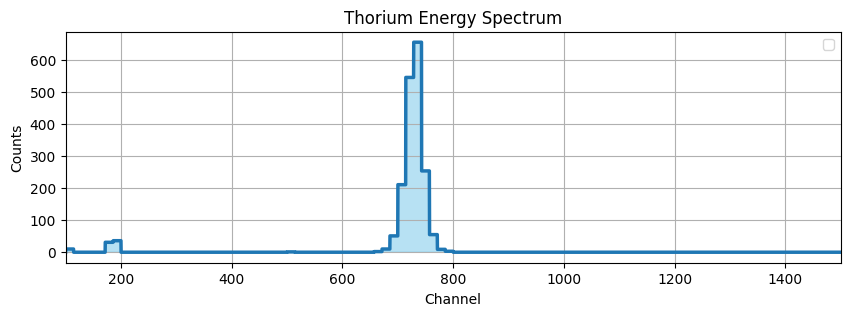

In [2]:
# Importar el archivo CSV
df = pd.read_csv('iladata.csv', delimiter=',')

# Eliminar la primera fila que contiene los nombres de las columnas
df = df.drop(0)

# Convertir los valores a tipo numérico
df = df.apply(pd.to_numeric)

# Obtener los datos de las columnas de interés
x = df['Sample in Buffer']
y1 = df['Sample in Window']
y2 = df['TRIGGER']
y3 = df['pynq_bd_i/dpp_counter_0_y[31:0]']
y4 = df['pynq_bd_i/xadc_buffer_0_y[31:0]']
y5 = df['pynq_bd_i/fir_fab_0_y[31:0]']
y6 = df['pynq_bd_i/trapz_klm_0_y[31:0]']
y7 = df['pynq_bd_i/xadc_wiz_0_drdy_out']
y8 = df['pynq_bd_i/dpp_counter_0_fifo_o[31:0]']

# Graficar utilizando NumPy
#plt.plot(x, y1, label='Sample in Window')
#plt.plot(x, y2, label='TRIGGER')
#plt.plot(x, y3, label='pynq_bd_i/dpp_counter_0_y[31:0]')
#plt.plot(x, y4, label='pynq_bd_i/xadc_buffer_0_y[31:0]')
#plt.plot(x, y5, label='pynq_bd_i/fir_fab_0_y[31:0]')
#plt.plot(x, y6, label='pynq_bd_i/trapz_klm_0_y[31:0]')
#plt.plot(x, y7, label='pynq_bd_i/xadc_wiz_0_drdy_out')

plt.figure(figsize=(10,3))
plt.plot(x/10, y8,color='tab:blue',linewidth=2.5)#, label='pynq_bd_i/dpp_counter_0_fifo_o[31:0]')
plt.fill_between(x/10, y8, color='skyblue', alpha=0.6)

# Configurar la leyenda y las etiquetas de los ejes
plt.title("Thorium Energy Spectrum")
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xlim([100,1500])
plt.grid(True)

# Mostrar el gráfico
#plt.show()

plt.savefig("output/TorioEnergy.pdf", format="pdf", bbox_inches="tight")

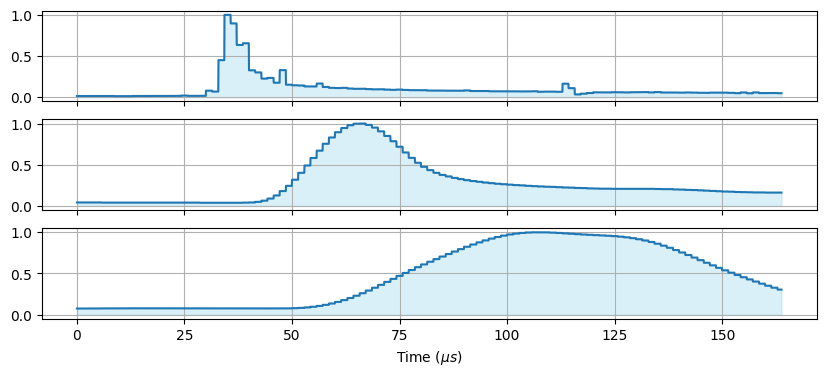

In [43]:
# Importar el archivo CSV con delimitador ','
df = pd.read_csv('iladata3.csv', delimiter=',')

# Eliminar la primera fila que contiene los nombres de las columnas
df = df.drop(0)

# Convertir los valores a tipo numérico
df = df.apply(pd.to_numeric)

# Obtener los datos de las columnas de interés
x = df['Sample in Buffer']
y1 = df['Sample in Window']
y2 = df['TRIGGER']
y3 = df['pynq_bd_i/dpp_counter_0_y[31:0]']
y4 = df['pynq_bd_i/xadc_buffer_0_y[31:0]']
y5 = df['pynq_bd_i/fir_fab_0_y[31:0]']
y6 = df['pynq_bd_i/trapz_klm_0_y[31:0]']
y7 = df['pynq_bd_i/xadc_wiz_0_drdy_out']
y8 = df['pynq_bd_i/dpp_counter_0_fifo_o[31:0]']

# Crear una figura con subplots
fig, axs = plt.subplots(3, sharex=True, figsize=(10,4))



# Iterar sobre las columnas y graficar en subplots separados
for i, (column_name, column_data) in enumerate(df.iloc[:, 4:7].items()):
    x_selected = x[::5]/100
    y_selected = column_data[::5]/np.max(column_data[::5])

    axs[i].plot(x_selected, y_selected, label=column_name)
    #axs[i].legend()
    #axs[i].set_ylabel(column_name)

    axs[i].fill_between(x_selected, y_selected, color='skyblue', alpha=0.3)      

    axs[i].grid(True)

# Configurar la etiqueta del eje x
axs[-1].set_xlabel('Time ($\mu s$)')



# Ajustar el espaciado entre subplots
#plt.tight_layout()

# Mostrar los subplots
plt.show()

In [51]:
# Importar el archivo CSV
df = pd.read_csv('iladata3.csv', delimiter=',')

# Eliminar la primera fila que contiene los nombres de las columnas
df = df.drop(0)

# Convertir los valores a tipo numérico
df = df.apply(pd.to_numeric)

# Obtener los datos de las columnas de interés
x = df['Sample in Buffer']
y1 = df['Sample in Window']
y2 = df['TRIGGER']
y3 = df['pynq_bd_i/dpp_counter_0_y[31:0]']
y4 = df['pynq_bd_i/xadc_buffer_0_y[31:0]']
y5 = df['pynq_bd_i/fir_fab_0_y[31:0]']
y6 = df['pynq_bd_i/trapz_klm_0_y[31:0]']
y7 = df['pynq_bd_i/xadc_wiz_0_drdy_out']
y8 = df['pynq_bd_i/dpp_counter_0_fifo_o[31:0]']



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


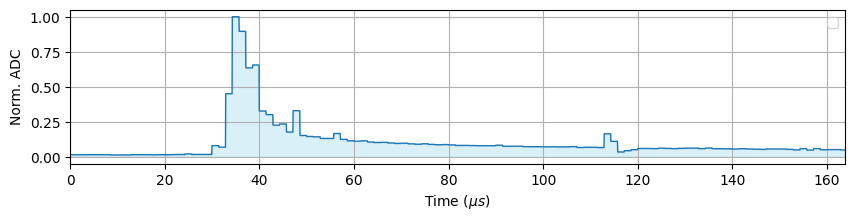

In [66]:
column_data = y4

# Graficar utilizando NumPy
x_selected = np.array(x[::5]/100)
y_selected = np.array(column_data[::5]/np.max(column_data[::5]))

plt.figure(figsize=(10,2))
plt.plot(x_selected, y_selected,color='tab:blue',linewidth=1)#, label='pynq_bd_i/dpp_counter_0_fifo_o[31:0]')
plt.fill_between(x_selected, y_selected, color='skyblue', alpha=0.3)

# Configurar la leyenda y las etiquetas de los ejes
#plt.title("Thorium Energy Spectrum")
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Norm. ADC')
plt.xlim([0,x_selected[-1]])
plt.grid(True)

# Mostrar el gráfico
#plt.show()

plt.savefig("output/xadc_output.pdf", format="pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


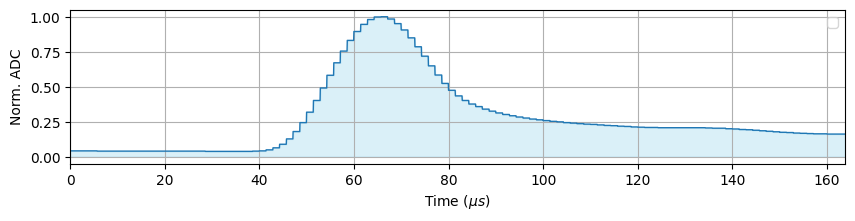

In [67]:
column_data = y5

# Graficar utilizando NumPy
x_selected = np.array(x[::5]/100)
y_selected = np.array(column_data[::5]/np.max(column_data[::5]))

plt.figure(figsize=(10,2))
plt.plot(x_selected, y_selected,color='tab:blue',linewidth=1)#, label='pynq_bd_i/dpp_counter_0_fifo_o[31:0]')
plt.fill_between(x_selected, y_selected, color='skyblue', alpha=0.3)

# Configurar la leyenda y las etiquetas de los ejes
#plt.title("Thorium Energy Spectrum")
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Norm. ADC')
plt.xlim([0,x_selected[-1]])
plt.grid(True)

# Mostrar el gráfico
#plt.show()

plt.savefig("output/fir_output.pdf", format="pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


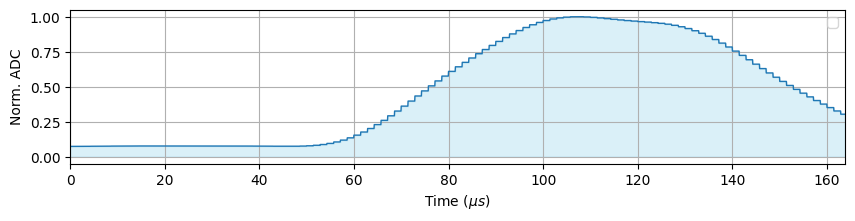

In [68]:
column_data = y6

# Graficar utilizando NumPy
x_selected = np.array(x[::5]/100)
y_selected = np.array(column_data[::5]/np.max(column_data[::5]))

plt.figure(figsize=(10,2))
plt.plot(x_selected, y_selected,color='tab:blue',linewidth=1)#, label='pynq_bd_i/dpp_counter_0_fifo_o[31:0]')
plt.fill_between(x_selected, y_selected, color='skyblue', alpha=0.3)

# Configurar la leyenda y las etiquetas de los ejes
#plt.title("Thorium Energy Spectrum")
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Norm. ADC')
plt.xlim([0,x_selected[-1]])
plt.grid(True)

# Mostrar el gráfico
#plt.show()

plt.savefig("output/trapz_output.pdf", format="pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


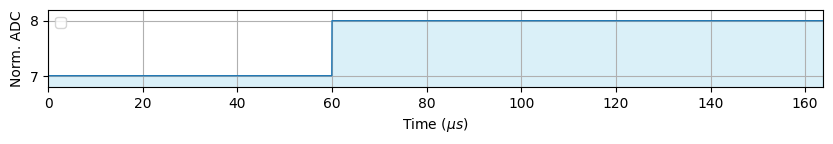

In [69]:
column_data = y3

# Graficar utilizando NumPy
x_selected = np.array(x[::5]/100)
y_selected = np.array(column_data[::5])

plt.figure(figsize=(10,1))
plt.plot(x_selected, y_selected,color='tab:blue',linewidth=1)#, label='pynq_bd_i/dpp_counter_0_fifo_o[31:0]')
plt.fill_between(x_selected, y_selected, color='skyblue', alpha=0.3)

# Configurar la leyenda y las etiquetas de los ejes
#plt.title("Thorium Energy Spectrum")
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Norm. ADC')
plt.xlim([0,x_selected[-1]])
plt.ylim([6.8,8.2])
plt.grid(True)

# Mostrar el gráfico
#plt.show()

plt.savefig("output/dpp_output.pdf", format="pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 1.4)

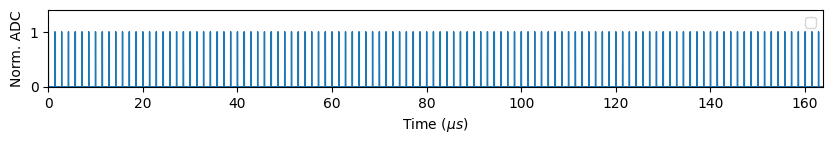

In [65]:
column_data = y7

# Graficar utilizando NumPy
x_selected = np.array(x[::]/100)
y_selected = np.array(column_data[::])

plt.figure(figsize=(10,1))
plt.plot(x_selected, y_selected,color='tab:blue',linewidth=1)#, label='pynq_bd_i/dpp_counter_0_fifo_o[31:0]')
plt.fill_between(x_selected, y_selected, color='skyblue', alpha=0.3)

# Configurar la leyenda y las etiquetas de los ejes
#plt.title("Thorium Energy Spectrum")
plt.legend()
plt.xlabel('Time ($\mu s$)')
plt.ylabel('Norm. ADC')
plt.xlim([0,x_selected[-1]])
plt.ylim([0,1.4])
#plt.grid(True)

# Mostrar el gráfico
#plt.show()

#plt.savefig("output/TorioEnergy.pdf", format="pdf", bbox_inches="tight")